In [1]:
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import collections

In [2]:
cols=['sentiment','id','date','query','user','tweet']

In [3]:
df = pd.read_csv("C:\\Users\\THE ONE\\Desktop\\MARKOV\\trainingandtestdata\\train.csv",encoding='latin1',names=cols)

In [11]:
df.head()

,sentiment,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df2 = df.iloc[:,[0,5]]

In [10]:
df2.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [7]:
np.random.seed(0)

In [8]:
index=np.random.randint(low=0, high=1599999,size=10000)

In [9]:
index

array([ 305711, 1484405,  117952, ..., 1038814,  449815, 1434832])

In [10]:
df3=df2.iloc[index,:]

In [11]:
df4 = df3.reset_index(drop=True)

In [12]:
df4

,sentiment,tweet
0,0,@rlangdon .... but I want it to be real. You w...
1,4,@ketadiablo - Just finished DUST AND MOONLIGHT...
2,0,@marchingstars i feel bad for the zines i stil...
3,4,@kahilee Sounds like it was a blast! Have a sa...
4,0,"@majornelson LOVING the zune, hating the lack ..."
...,...,...
9995,4,"Suspense is killing me, but it has to take a w..."
9996,4,@jaywoo2 Haha yeah that's a highlight for me a...
9997,4,@liunker I'm up if you need someone to talk to...
9998,0,"@DonnieWahlberg I donÂ´t know why, but, I bel..."


In [13]:
df4['sentiment']=df4['sentiment'].replace({4:1})

In [14]:
df4

,sentiment,tweet
0,0,@rlangdon .... but I want it to be real. You w...
1,1,@ketadiablo - Just finished DUST AND MOONLIGHT...
2,0,@marchingstars i feel bad for the zines i stil...
3,1,@kahilee Sounds like it was a blast! Have a sa...
4,0,"@majornelson LOVING the zune, hating the lack ..."
...,...,...
9995,1,"Suspense is killing me, but it has to take a w..."
9996,1,@jaywoo2 Haha yeah that's a highlight for me a...
9997,1,@liunker I'm up if you need someone to talk to...
9998,0,"@DonnieWahlberg I donÂ´t know why, but, I bel..."


In [15]:
pat1='@[^ ]+'
pat2='[0-9]'
pat3='#[^ ]+'
pat4='www.[^ ]+'
pat5='http[^ ]+'

combined_pat = '|'.join((pat1,pat2,pat3,pat4,pat5))

In [16]:
a=re.sub(combined_pat,'',df4['tweet'][1])

In [17]:
a

' - Just finished DUST AND MOONLIGHT this week. So glad about you have a sequel. '

In [18]:
clean = []
for t in df4['tweet']:
    lower=t.lower()
    re_out= re.sub(combined_pat,' ',lower)
    neg_out=re.sub("n't",'not',re_out)
    clean.append(neg_out)

In [19]:
clean

['  .... but i want it to be real. you would level up your geek cred! ',
 '  - just finished dust and moonlight this week. so glad about you have a sequel. ',
 "  i feel bad for the zines i still need to send you! eep! same goes to   i'm sorry ",
 '  sounds like it was a blast! have a safe flight and hope you get some rest. i canot imagine catching a flight the next morning! ',
 '  loving the zune, hating the lack of canada love ',
 "i'm freaking hell tired,but i donot feel like sleeping. i dont know why ",
 'funniest twitter profile pic in my opinion   ',
 'off to bed. my shakespeare final is tomorrow and i so donot feel ready for it. ',
 'ugh, how could i forgot my glove full of water with an eyeball in it!? ',
 'rest in peace grandma. gone but never forgotten. gonna put her   feet under the ground tomorrow      love you&amp;miss you!  &lt;/ ',
 'has just woke up , got a mega hangover ',
 'have no laptop, no moe twitter for me ',
 'history exam in an hour. been up since six and am fe

In [20]:
clean_df = pd.DataFrame(clean,columns=['text'])

In [21]:
clean_df ['sentiment'] = df4['sentiment']
clean_df

,text,sentiment
0,.... but i want it to be real. you would lev...,0
1,- just finished dust and moonlight this week...,1
2,i feel bad for the zines i still need to sen...,0
3,sounds like it was a blast! have a safe flig...,1
4,"loving the zune, hating the lack of canada l...",0
...,...,...
9995,"suspense is killing me, but it has to take a w...",1
9996,haha yeah that's a highlight for me at the m...,1
9997,i'm up if you need someone to talk to about ...,1
9998,"i donâ´t know why, but, i believe that itâ´...",0


# positive tweets


In [22]:
pos_df= clean_df[clean_df.sentiment==1]

In [23]:
pos_df

,text,sentiment
1,- just finished dust and moonlight this week...,1
3,sounds like it was a blast! have a safe flig...,1
6,funniest twitter profile pic in my opinion,1
13,unpacking my new apartment,1
14,i`m actually enjoyinq a -crazy nice- day in me...,1
...,...,...
9991,thanx for the recommendation!,1
9995,"suspense is killing me, but it has to take a w...",1
9996,haha yeah that's a highlight for me at the m...,1
9997,i'm up if you need someone to talk to about ...,1


# negative tweets

In [24]:
neg_df=clean_df[clean_df.sentiment==0]

In [25]:
neg_df

,text,sentiment
0,.... but i want it to be real. you would lev...,0
2,i feel bad for the zines i still need to sen...,0
4,"loving the zune, hating the lack of canada l...",0
5,"i'm freaking hell tired,but i donot feel like ...",0
7,off to bed. my shakespeare final is tomorrow a...,0
...,...,...
9989,is watching bay area derby girls play seattle'...,0
9992,needs guitar hero for the ps .,0
9993,workin on the railroad... without sunshine and...,0
9994,jaded today,0


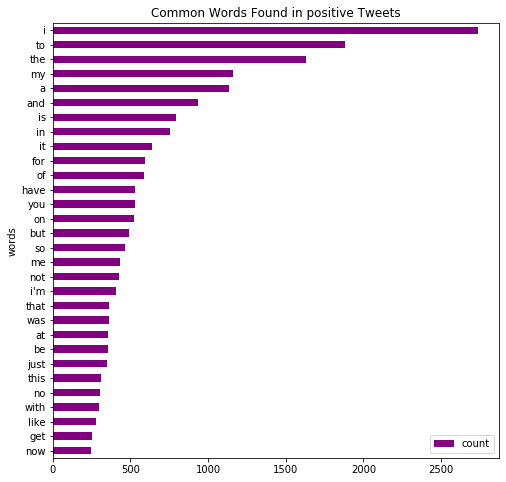

In [40]:
pos_corpus=" "
for text in pos_df['text']:
    pos_corpus+=text
pos_wordlist = pos_corpus.split()
pos_wordlist=collections.Counter(pos_wordlist)
pos_wordlist.most_common(50)
wordlist = pd.DataFrame(neg_wordlist.most_common(30),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
wordlist.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in positive Tweets")

plt.show()


[('i', 1759),
 ('the', 1638),
 ('to', 1583),
 ('a', 1271),
 ('you', 1001),
 ('and', 906),
 ('my', 763),
 ('for', 723),
 ('in', 643),
 ('is', 617),
 ('of', 570),
 ('it', 547),
 ('on', 494),
 ('with', 400),
 ('have', 378),
 ('that', 367),
 ('so', 358),
 ('me', 352),
 ('be', 350),
 ('just', 348),
 ('good', 340),
 ("i'm", 323),
 ('-', 312),
 ('at', 310),
 ('love', 309),
 ('was', 292),
 ('but', 279),
 ('your', 270),
 ('not', 241),
 ('are', 239),
 ('this', 238),
 ('up', 232),
 ('all', 224),
 ('like', 216),
 ('get', 207),
 ('going', 192),
 ('out', 191),
 ("it's", 188),
 ('new', 186),
 ('day', 186),
 ('u', 180),
 ('from', 173),
 ('do', 171),
 ('we', 168),
 ('what', 167),
 ('can', 165),
 ('will', 165),
 ('some', 163),
 ('see', 161),
 ('got', 161)]

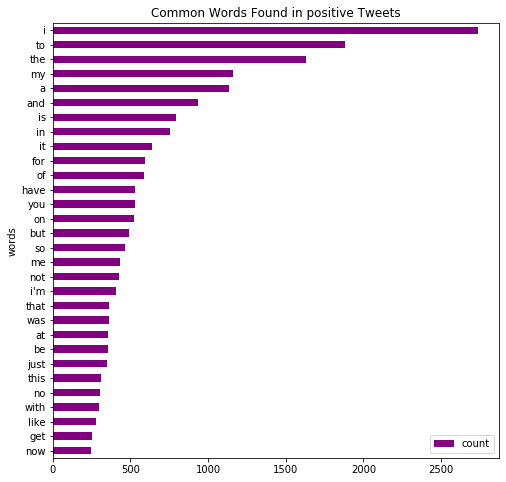

In [41]:
neg_corpus=" "
for text in neg_df['text']:
    neg_corpus+=text
neg_wordlist = neg_corpus.split()
neg_wordlist=collections.Counter(neg_wordlist)
neg_wordlist.most_common(50)


[('i', 2736),
 ('to', 1881),
 ('the', 1632),
 ('my', 1163),
 ('a', 1132),
 ('and', 932),
 ('is', 794),
 ('in', 757),
 ('it', 641),
 ('for', 593),
 ('of', 589),
 ('have', 532),
 ('you', 527),
 ('on', 520),
 ('but', 490),
 ('so', 468),
 ('me', 433),
 ('not', 427),
 ("i'm", 410),
 ('that', 362),
 ('was', 362),
 ('at', 358),
 ('be', 355),
 ('just', 351),
 ('this', 311),
 ('no', 307),
 ('with', 296),
 ('like', 276),
 ('get', 252),
 ('now', 246),
 ('all', 237),
 ('go', 234),
 ('up', 220),
 ("it's", 217),
 ('still', 214),
 ('out', 210),
 ('are', 207),
 ('work', 206),
 ('canot', 202),
 ('miss', 200),
 ('donot', 196),
 ('got', 191),
 ('im', 191),
 ('do', 187),
 ('-', 182),
 ('day', 179),
 ('back', 179),
 ('too', 178),
 ('going', 177),
 ('from', 177)]

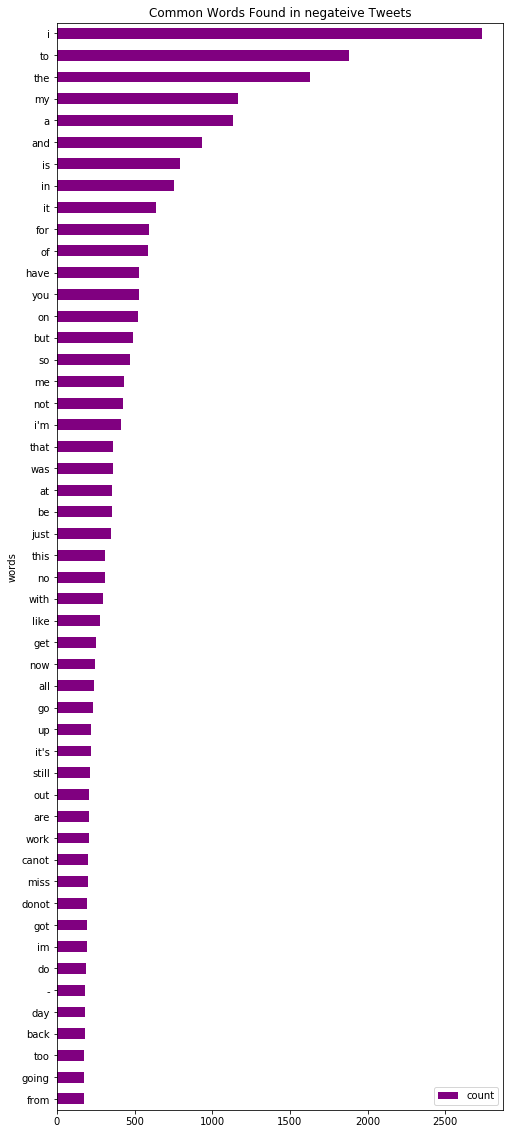

In [43]:
wordlist = pd.DataFrame(neg_wordlist.most_common(50),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 20))

# Plot horizontal bar graph
wordlist.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in negateive Tweets")

plt.show()


[('i', 2736),
 ('to', 1881),
 ('the', 1632),
 ('my', 1163),
 ('a', 1132),
 ('and', 932),
 ('is', 794),
 ('in', 757),
 ('it', 641),
 ('for', 593),
 ('of', 589),
 ('have', 532),
 ('you', 527),
 ('on', 520),
 ('but', 490),
 ('so', 468),
 ('me', 433),
 ('not', 427),
 ("i'm", 410),
 ('that', 362),
 ('was', 362),
 ('at', 358),
 ('be', 355),
 ('just', 351),
 ('this', 311),
 ('no', 307),
 ('with', 296),
 ('like', 276),
 ('get', 252),
 ('now', 246),
 ('all', 237),
 ('go', 234),
 ('up', 220),
 ("it's", 217),
 ('still', 214),
 ('out', 210),
 ('are', 207),
 ('work', 206),
 ('canot', 202),
 ('miss', 200),
 ('donot', 196),
 ('got', 191),
 ('im', 191),
 ('do', 187),
 ('-', 182),
 ('day', 179),
 ('back', 179),
 ('too', 178),
 ('going', 177),
 ('from', 177)]

In [47]:
neg_corpus=" "
for text in neg_df['text']:
    neg_corpus+=text
neg_wordlist = neg_corpus.split()
neg_wordlist=collections.Counter(neg_wordlist)
neg_wordlist.most_common(50)

neg_wordlist_df=pd.DataFrame(neg_wordlist.most_common(),columns=['words', 'count'])
pos_wordlist_df=pd.DataFrame(pos_wordlist.most_common(),columns=['words', 'count'])

In [48]:
neg_wordlist=np.array(neg_wordlist_df['words'])
pos_wordlist=np.array(pos_wordlist_df['words'])


In [49]:
for negword in neg_wordlist:
    for posword in pos_wordlist:
        if negword==posword:
            index=np.where(pos_wordlist==posword)
            pos_wordlist=np.delete(pos_wordlist,index[0][0])
            index=np.where(neg_wordlist==posword)
            neg_wordlist=np.delete(neg_wordlist,index[0][0])

In [50]:
print(pos_wordlist[0:700])

['hehe' 'that,' 'awesome.' 'excited.' 'ow' 'brilliant' 'followers.'
 'fantastic' 'quote' 'happiness' 'george' 'bless' 'birthday!' 'fab' 'lake'
 'man!' 'woot' 'are.' 'ladies' 'jump' 'mo' 'drew' 'folks' 'rain,'
 'thankyou' 'stuff!' 'movie!' 'spread' 'sir' 'nice.' '-&gt;' 'mornin'
 'pre' 'amazing.' 'hehe,' 'andy' 'cloud' 'listened' 'twitpic' 'closer'
 'pics.' 'pro.' 'hun!' 'hitting' 'congratulations' 'back...' 'blessed'
 'ah,' 'included' 'thee' 'cool,' 'thanks!!' 'age' 'shine' 'celebrity'
 'fun!!!' 'woot!' 'higher' 'ya!' 'anyways' '&quot;who' 'fav' 'fellow' '*'
 'album!' 'â\x99¥' 'donate' 'warped' 'nick' 'smiling' 'doll' 'bed!'
 'depends' 'paris' 'careful' 'downloaded' 'background' 'sites' 'irish' 'z'
 'heyy' 'shout' 'not,' 'me!!!' 'yay,' 'wins' 'main' 'fitness' 'hi!' 'ang'
 'bird' '--&gt;' 'ch.' 'hows' 'coffee!' 'dust' 'edge' 'smiles' 'fortune'
 'amazing,' 'tweets,' 'recital' 'cum' 'minus' 'strawberries' 'networking'
 "cousin's" 'funny.' "o'clock" 'singer' 'pleasure' 'exactly.' 'stone'
 

In [51]:
print(neg_wordlist[0:200])

['stuck' 'broke' 'tummy' 'upset' 'slow' 'sadly' 'neck' 'sucks.' 'hates'
 'lonely' 'ruined' 'hav' 'dnt' "father's" 'load' 'maths' 'fathers' 'doubt'
 'puppy' 'freakin' 'taken' 'hasnot' 'nasty' 'ugh!' 'sooooo' 'hurts.'
 'shitty' 'lame.' 'swear' 'pissed' 'knee' 'lack' 'eaten' 'apps' 'working.'
 'yr' 'uncle' 'dropped' 'cloudy' 'to.' 'noooo' 'ouch' 'ima' 'sadly,'
 'ugh,' 'wouldnt' 'school,' 'sad,' 'bc' 'expensive' 'hurt.' 'exhausted'
 'headache.' 'susan' 'counting' 'lips' 'hayfever' 'airport' 'long,'
 'changes' 'rough' 'sunburn' 'dumb' 'allergies' 'gone.' 'depressing'
 'fault' 'loud' 'argh' 'sick,' 'ache' 'grass' 'mm' 'go?' 'gutted'
 'dentist' 'raining.' 'sleeping.' '&lt;/' 'hour.' 'scene' 'happy.'
 'clouds' 'reality' 'trains' 'audio' 'released' 'awkward' 'everytime'
 'work...' 'poorly' 'fawcett' 'balloon' 'pushing' 'worse.' 'accidentally'
 'fine.' 'naughty' 'alone.' ':s' 'dry' 'orlando' 'cutting' 'bbm'
 'situation' 'hurting' 'transformers' 'but...' 'rained' 'stuffed' 'muscle'
 'upgrade' 'cr

In [53]:
plt.figure(figsize=(16,10))
neg_vis=WordCloud(width=400,height=400,).generate(neg_wordlist)
plt.imshow(neg_vis)
plt.show()

TypeError: cannot use a string pattern on a bytes-like object

<Figure size 1152x720 with 0 Axes>